# Homework 3 - CMPE 482 Numerical Linear Algebra
#### Author: Deniz Ekiz , 2016700051
### Book: Trefethen, Bau.


## 3.6.a

Prove that $ \|x\|'$ is a norm such that 
$
\begin{eqnarray}
\|x\|'= \sup_{\|y\| = 1} { |y^*x|} .
\end{eqnarray}
$
A norm must satisfy the following conditions, for all vectors x and y and all scalars $\alpha \in  \mathbb{C} $


$
(1)\:  \|x\|  \geq 0,\: and \: \|x\| = 0 \:  only \: if \: x = 0, \\
(2)\: \|x + y \| \leq \|x\| + \|y\|, \\
(3)\: \|\alpha x\| = |\alpha|\|x\|
$

Since , $ \begin{eqnarray} \|x\|'= \sup_{\|y\| = 1} |y^*x|  \end{eqnarray} $.

The result of absolute value is always $\geq 0$,$\\$ and when $x = 0$, $|y^*0| = 0$ the result of the product also will be zero.

Therefore $\|x\|'$ satisfies (1).  

$ \begin{eqnarray} \|\alpha x\|'= \sup_{\|y\| = 1} |\alpha y^*x| = |\alpha| . \sup_{\|y\| = 1} |y^*x| \end{eqnarray}  $.

From, $|x||y| = |xy| $ Condition (3) is satisfied

$ \|x + z \| \leq \|x\| + \|z\| $

$ |y^*x+ y^*z| \leq |y^*x| + |y^*z| $

Let's take the square of this equation:

$ (y^*x)^2 + (y^*z)^2 + 2y^*xy^*z \leq  (y^*x)^2 + (y^*z)^2 + 2|y^*x||y^*z| $

Thus,

$2y^*xy^*z \leq  2|y^*x||y^*z| $

Hence,

$ \|x\|' $ satisfies all the conditions of the norm proposed by the (3.1) in the textbook


## 4.5

Let A be  $A$ $\in$ $ \mathbb{R}^{mxn} $
$A$ $=$ $U\Sigma V^{-1}$

$\|A\hat{x}\|_2^2$ = $\sup\limits_{\hat{x}\neq0} \dfrac{\|A\hat{x}\|_2^2}{\|\hat{x}\|_2^2} $= $\sup\limits_{\hat{x}\neq0} \dfrac{\hat{x}^*A^*Ax}{\hat{x}^*\hat{x}} $

Let $\hat{x} = x+yi$, if $y = 0$ $\hat{x}$ is real. 

$\dfrac{ \|Ax\|_2^2 + \|Ay\|_2^2}{\|x\|_2^2 + \|y\|_2^2} $

$\|A\|_2^2\|x\|_2^2 + \|A\|_2^2\|y\|_2^2 =  \|Ax\|_2^2 + \|Ay\|_2^2
$

Hence, if   $A$ $\in$ $ \mathbb{R}^{mxn} $, it has a real SVD however, it might also have complex SVD.

## 5.3


### (a)
$A^*A$ and $\Sigma^*\Sigma$ has same n eigenvalues.

The eigenvalues of the diagonal matrix  $\Sigma^*\Sigma$ are $\sigma_1^2$,$\sigma_2^2$ ,...,  $\sigma_p^2$

We need to calculate eigenvalues of $A^*A$. 

Then, take the square root of eigenvalues.

$det(\lambda I -A^*A) = 0 $
Let $A^*A = M$


In [48]:
A = [-2,11;-10,5];
A
M = A'*A
# 2x2 Matrix -> eigenvalues
# Finds the eigenvalues of 2x2 matrix
# the values come from quadratic equation ax^2 +bx + c = 0
function eigan =  eig_2_2(M)
    a = 1;
    b = -M(1,1) - M(2,2);
    c = - M(1,2)*M(2,1) + M(1,1)*M(2,2);
    e1 = (-b + sqrt(b^2 - 4*a*c))/(2*a);
    e2 = (-b - sqrt(b^2 - 4*a*c))/(2*a);
    eigan =  [e1;e2];
endfunction
e_value = eig_2_2(M)
# square root of eigen values are equal to sigma
sigma_vector = e_value.^0.5

[v,d] = eig(M)

A =

   -2   11
  -10    5

M =

   104   -72
   -72   146

e_value =

   200
    50

sigma_vector =

   14.1421
    7.0711

v =

  -0.80000  -0.60000
  -0.60000   0.80000

d =

Diagonal Matrix

    50     0
     0   200



Eigenvectors of $A^*A$ and $AA^*$ are equal to U and V

In [49]:
e_value = eig_2_2(A*A')
U = eye(2);
n_1 = sort(null(eye(2)*e_value(1) - A*A'))
n_2 = sort(null(eye(2)*e_value(2) - A*A'))
U(1,1) = n_1(1);
U(2,1) = n_1(2);

U(1,2) = n_2(2);
U(2,2) = n_2(1)

V = eye(2);
e_value = eig_2_2(A'*A)
n_1 = sort(null(eye(2)*e_value(1) - A'*A))
n_2 = sort(null(eye(2)*e_value(2) - A'*A))
V(1,1) = n_1(1);
V(2,1) = n_1(2);
V(1,2) = n_2(2);
V(2,2) = n_2(1)



E = eye(2);
E(1,1) = sigma_vector(1);
E(2,2) = sigma_vector(2)

e_value =

   200
    50

n_1 =

   0.70711
   0.70711

n_2 =

  -0.70711
   0.70711

U =

   0.70711   0.70711
   0.70711  -0.70711

e_value =

   200
    50

n_1 =

  -0.60000
   0.80000

n_2 =

   0.60000
   0.80000

V =

  -0.60000   0.80000
   0.80000   0.60000

E =

Diagonal Matrix

   14.1421         0
         0    7.0711



Let's compute $U\Sigma V^*$ to double check our results

In [50]:
A = U*E*V

A =

   -2.0000   11.0000
  -10.0000    5.0000



### (b) 
Singular values of $A$ are the diagonal elements of $\Sigma$

In [51]:
E
singular_value_1 = E(1,1)
singular_value_2 = E(2,2)

E =

Diagonal Matrix

   14.1421         0
         0    7.0711

singular_value_1 =  14.142
singular_value_2 =  7.0711


Left signular values are 



In [52]:
l_1 = null(eye(2)*e_value(1) - A*A')
l_2 = flip(null(eye(2)*e_value(2) - A*A'))

l_1 =

   0.70711
   0.70711

l_2 =

   0.70711
  -0.70711



Right singular values are


In [53]:
r_1 = null(eye(2)*e_value(1) - A'*A)
r_2 = flip(null(eye(2)*e_value(2) - A*A'))

r_1 =

  -0.60000
   0.80000

r_2 =

   0.70711
  -0.70711



Let $S$ be a unit ball in $\mathbb{R}^2$ Plot S and AS.

r =  1
r =  1


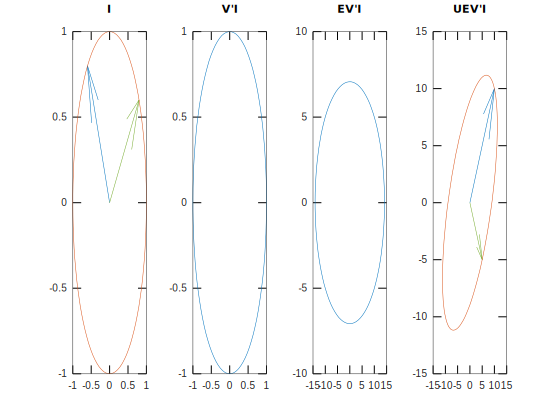

In [76]:
r = 1
t = linspace(0,2*pi,100)';
unit_x = [sin(t) cos(t)];


plot(unit_x(:,1),unit_x(:,2)); 


V_T = V'*unit_x';
EE = E*V_T;

N = A*unit_x';
plot(N(1,:),N(2,:))
r =  1


subplot (1, 4, 1)
quiver(0,0,V(1,1),V(2,1));
hold on;
quiver(0,0,V(1,2),V(2,2))
hold on;
plot(unit_x(:,1),unit_x(:,2)); 
title("I");
subplot (1, 4, 2)
plot(V_T(1,:),V_T(2,:))
title("V'I");
subplot (1, 4, 3)
plot(EE(1,:),EE(2,:))
title("EV'I");
subplot (1, 4, 4)
quiver(0,0,U(1,1)*sigma_vector(1),U(1,2)*sigma_vector(1))
hold on;
quiver(0,0,U(2,1)*sigma_vector(2),U(2,2)*sigma_vector(2))
hold on;
plot(N(1,:),N(2,:))
title("UEV'I");


### (c)
1 norm of A is the maximum value of the absolute value sum of columns

In [55]:
one_norm = max(abs(A(1,1))+abs(A(2,1)),abs(A(1,2))+abs(A(2,2)))

one_norm =  16


In [56]:
eig_A = eig_2_2(A'*A)

two_norm = sqrt(max(abs(eig_A(1)),abs(eig_A(2))))

eig_A =

   200
    50

two_norm =  14.142


In [57]:
infinity_norm =  max(abs(A(1,1))+abs(A(1,2)),abs(A(2,1))+abs(A(2,2)))

infinity_norm =  15


In [58]:
frobenius_norm =  sqrt(trace(A'*A))

frobenius_norm =  15.811


### (d)

$A^-1 = (U\Sigma V')^{-1}$

Since $\Sigma$ is a diagonal matrix  $\dfrac{1}{\Sigma} = \Sigma^{-1}$

$A^-1 = V\Sigma^{-1} U'  $



In [59]:
A_inverse = V*E^(-1)*U'

A_inverse =

   0.050000  -0.110000
   0.100000  -0.020000



Let's double check calculation using octave's builtin method.

In [60]:
A_inverse = inv(A)

A_inverse =

   0.050000  -0.110000
   0.100000  -0.020000



### (e)
Finding eigenvalue of A is easy because, I have implement the function before

In [61]:
A = [-2,11;-10,5];

eigenvalue_of_a = eig_2_2(A)

eigenvalue_of_a =

   1.5000 + 9.8869i
   1.5000 - 9.8869i



### (f)

In [62]:
product_of_eigenvalues_of_A = eigenvalue_of_a(1)*eigenvalue_of_a(2)
det_A = det(A)
abs_det_a = abs(det(A))
sigma_product = sigma_vector(1)*sigma_vector(2)


product_of_eigenvalues_of_A =  100.00
det_A =  100
abs_det_a =  100
sigma_product =  100.00


### (g)

In [63]:
area_of_elipsoid = pi*sigma_product

area_of_elipsoid =  314.16
